In [23]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside this notebook, not an external window
%matplotlib inline



#neural network class definition
class neuralNetwork:
    
    #step 1:initialise the neural network                              #***初始化函数里自己的非外界的变量或函数，之后的所有类成员函数里都将会使用
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):  #这一行为函数形参，与外界传递数据用的
        self.inodes = inputnodes                                         #这一行的名字“inodes”为构造函数(初始函数)自己使用的名字，以下几行同理
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
       
        # learning rate
        self.lr = learningrate
    
    
          #以下为权重矩阵初始化生成部分
          #link weight matrices,W_I-H and W_H-O
          #权重矩阵里的W_i_j指的是上一层的i节点指向下一层的j节点的权重
        self.wih=numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))
        self.who=numpy.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes))
    
    
          
          #定义激活函数sigmoid,以便后续能使用
        self.activation_function=lambda x:scipy.special.expit(x)
    
        pass
    
    #step 2:train the neural network
    def train(self,inputs_list,targets_list):
        
        inputs=numpy.array(inputs_list, ndmin=2).T          #这里的inputs_list是训练集的,是下面的n.train(inputs,targets) 传过来的
        targets=numpy.array(targets_list, ndmin=2).T        #这里的targets_list也是训练集的，是下面的n.train(inputs,targets) 传过来的
        
        #计算隐藏层的输入、输出
        hidden_inputs=numpy.dot(self.wih,inputs)
        hidden_outputs=self.activation_function(hidden_inputs)
        
        #计算输出层的输入、输出
        final_inputs=numpy.dot(self.who,hidden_outputs)
        final_outputs=self.activation_function(final_inputs)
        
        
        
        
        #Ek（Tk-Ok）组成的列向量（一切反向传播的“开始基数”，以后就按权重的绝对值分配这个“开始基数”了；按理说应该是按权重的占比分配的）
        output_errors=targets-final_outputs
        
        #求出第二层hidden层的反向组合误差（不是误差函数所指的误差，而是“Ek（Tk-Ok）”反向组合的一次误差）
        hidden_errors=numpy.dot(self.who.T,output_errors)
        
        
        
        
        #下面权重矩阵正式开始学习
        #who
        self.who+=self.lr*numpy.dot((output_errors*final_outputs*(1.0-final_outputs)),numpy.transpose(hidden_outputs))
        #wih
        self.wih+=self.lr*numpy.dot(( hidden_errors*hidden_outputs*(1.0-hidden_outputs)),numpy.transpose(inputs)) 
        #因为输入层是接受多少就是多少，不经过sigmoid函数的，所以直接是inputs
        
        pass
     
        
        
        
    #step 3:use the neural network or query the neural network
    def query(self,inputs_list):
        #将inputs_list信息(一般为需要处理出结果的未标签输入)换转为inputs
        inputs=numpy.array(inputs_list,ndmin=2).T
        
        #计算隐藏层的输入输出
        hidden_inputs=numpy.dot(self.wih,inputs)
        hidden_outputs=self.activation_function(hidden_inputs)
        
        #计算输出层的输入输出
        final_inputs=numpy.dot(self.who,hidden_outputs)
        final_outputs=self.activation_function(final_inputs)
        
        
        return final_outputs


In [24]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning rate
learning_rate = 0.3

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [25]:
data_file=open("mnist_dataset/mnist_train_100.csv",'r')
data_list=data_file.readlines()                                  #一次性读取所有训练数据
data_file.close()                                                #关闭是为了以后的不会误操作(输成data_file)，从这里的data_file中读取数据
                                                                 #data file被关闭了，但是data_list继承了它的数据，幸存了下来

In [26]:
for record in data_list:      #*****因为是“record in data_list”，所以record在这里代表一行的数据*******
  
    all_values=record.split(',')
    inputs=(numpy.asfarray(all_values[1:])/255.0*0.99)+0.01         #将数据的范围转换到0.01至1.0之间 *******这里输出的是行数组还是列数组？
   
   #利用循环制造目标值
    targets=numpy.zeros(output_nodes)+0.01                           #输出目标形成的行数组
    targets[int(all_values[0])]=0.99                                #令训练集的数据标签值由字符化为int，而输出序号（target行数组里的序号）刚好与标签值重名（即target【4】就代表数字4或标签值4）
   
   #所以令行数组的对应数来代替标签值，来承受0.99
    n.train(inputs,targets)                                         #进行一次训练，将inputs传给train函数的形参—inputs_list，将targets传给train函数的形参—targets_list
    pass

In [27]:
#测试网络
test_data_file=open("mnist_dataset/mnist_test_10.csv",'r')
test_data_list=test_data_file.readlines()                                           #一次性读取所有测试数据
test_data_file.close()


In [28]:
all_values=test_data_list[0].split(',')
print(all_values[0])                         #*****all_values里的元素还是从0开始计数的,但是“除去第一个”却是这种写法--all_values【1：】****



7


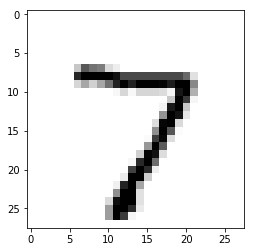

In [29]:
image_array=numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array,cmap='Greys',interpolation='None')

In [30]:
n.query((numpy.asfarray(all_values[1:])/255.0*0.99)+0.01 )                  #这里直接询问，因为只测试一个数

array([[0.0239648 ],
       [0.02433782],
       [0.0406802 ],
       [0.08631207],
       [0.06859624],
       [0.02656394],
       [0.00556703],
       [0.76875366],
       [0.04361343],
       [0.06672593]])

In [31]:
#正式采用60000个训练数据进行训练
data_file=open("mnist_dataset/mnist_train.csv",'r')
data_list=data_file.readlines()                                  #一次性读取所有训练数据
data_file.close()                                                #关闭是为了以后的不会误操作(输成data_file)，从这里的data_file中读取数据
                                                                 #data file被关闭了，但是data_list继承了它的数据，幸存了下来

for record in data_list:                                           #*****因为是“record in data_list”，所以record在这里代表一行的数据*******
    all_values=record.split(',')
    inputs=(numpy.asfarray(all_values[1:])/255.0*0.99)+0.01         #将数据的范围转换到0.01至1.0之间 *******这里输出的是行数组还是列数组？
   #利用循环制造目标值
    targets=numpy.zeros(output_nodes)+0.01                           #输出目标形成的行数组
    targets[int(all_values[0])]=0.99                                #令训练集的数据标签值由字符化为int，而输出序号（target行数组里的序号）刚好与标签值重名（即target【4】就代表数字4或标签值4）
   #所以令行数组的对应数来代替标签值，来承受0.99
    n.train(inputs,targets)                          #对名字为n的神经网络进行一次训练，将inputs传给train函数的形参—inputs_list，将targets传给train函数的形参—targets_list
    pass




        

7 correct_lable
7 network's answer
2 correct_lable
2 network's answer
1 correct_lable
1 network's answer
0 correct_lable
0 network's answer
4 correct_lable
4 network's answer
1 correct_lable
1 network's answer
4 correct_lable
4 network's answer
9 correct_lable
9 network's answer
5 correct_lable
4 network's answer
9 correct_lable
9 network's answer
0 correct_lable
0 network's answer
6 correct_lable
6 network's answer
9 correct_lable
9 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
5 correct_lable
5 network's answer
9 correct_lable
9 network's answer
7 correct_lable
7 network's answer
3 correct_lable
3 network's answer
4 correct_lable
4 network's answer
9 correct_lable
9 network's answer
6 correct_lable
6 network's answer
6 correct_lable
6 network's answer
5 correct_lable
5 network's answer
4 correct_lable
4 network's answer
0 correct_lable
0 network's answer
7 correct_lable
7 network's answer
4 correct_lable
4 network's answer
0 correct_lable
0 ne

4 correct_lable
4 network's answer
0 correct_lable
0 network's answer
2 correct_lable
2 network's answer
7 correct_lable
7 network's answer
4 correct_lable
4 network's answer
3 correct_lable
3 network's answer
3 correct_lable
3 network's answer
0 correct_lable
0 network's answer
0 correct_lable
0 network's answer
3 correct_lable
3 network's answer
1 correct_lable
1 network's answer
9 correct_lable
9 network's answer
6 correct_lable
6 network's answer
5 correct_lable
5 network's answer
2 correct_lable
3 network's answer
5 correct_lable
5 network's answer
9 correct_lable
1 network's answer
2 correct_lable
7 network's answer
9 correct_lable
9 network's answer
3 correct_lable
3 network's answer
0 correct_lable
0 network's answer
4 correct_lable
4 network's answer
2 correct_lable
2 network's answer
0 correct_lable
0 network's answer
7 correct_lable
7 network's answer
1 correct_lable
1 network's answer
1 correct_lable
1 network's answer
2 correct_lable
2 network's answer
1 correct_lable
1 ne

2 network's answer
7 correct_lable
7 network's answer
7 correct_lable
9 network's answer
0 correct_lable
8 network's answer
8 correct_lable
8 network's answer
7 correct_lable
7 network's answer
4 correct_lable
4 network's answer
4 correct_lable
4 network's answer
7 correct_lable
7 network's answer
9 correct_lable
9 network's answer
6 correct_lable
6 network's answer
9 correct_lable
9 network's answer
0 correct_lable
0 network's answer
9 correct_lable
9 network's answer
8 correct_lable
8 network's answer
0 correct_lable
0 network's answer
4 correct_lable
9 network's answer
6 correct_lable
6 network's answer
0 correct_lable
0 network's answer
6 correct_lable
6 network's answer
3 correct_lable
3 network's answer
5 correct_lable
5 network's answer
4 correct_lable
4 network's answer
8 correct_lable
8 network's answer
3 correct_lable
3 network's answer
3 correct_lable
3 network's answer
9 correct_lable
9 network's answer
3 correct_lable
3 network's answer
3 correct_lable
3 network's answer
3

1 correct_lable
1 network's answer
7 correct_lable
7 network's answer
4 correct_lable
4 network's answer
0 correct_lable
0 network's answer
3 correct_lable
3 network's answer
5 correct_lable
5 network's answer
5 correct_lable
5 network's answer
8 correct_lable
8 network's answer
6 correct_lable
6 network's answer
3 correct_lable
5 network's answer
2 correct_lable
0 network's answer
6 correct_lable
6 network's answer
7 correct_lable
7 network's answer
6 correct_lable
6 network's answer
6 correct_lable
6 network's answer
3 correct_lable
1 network's answer
2 correct_lable
2 network's answer
7 correct_lable
7 network's answer
8 correct_lable
9 network's answer
1 correct_lable
1 network's answer
1 correct_lable
1 network's answer
7 correct_lable
9 network's answer
5 correct_lable
4 network's answer
6 correct_lable
6 network's answer
4 correct_lable
4 network's answer
9 correct_lable
9 network's answer
5 correct_lable
5 network's answer
1 correct_lable
6 network's answer
3 correct_lable
3 ne

7 network's answer
0 correct_lable
0 network's answer
2 correct_lable
2 network's answer
4 correct_lable
4 network's answer
1 correct_lable
1 network's answer
1 correct_lable
1 network's answer
6 correct_lable
1 network's answer
6 correct_lable
6 network's answer
9 correct_lable
9 network's answer
2 correct_lable
2 network's answer
8 correct_lable
8 network's answer
7 correct_lable
7 network's answer
2 correct_lable
2 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
5 correct_lable
5 network's answer
0 correct_lable
7 network's answer
9 correct_lable
9 network's answer
1 correct_lable
1 network's answer
7 correct_lable
9 network's answer
0 correct_lable
0 network's answer
6 correct_lable
6 network's answer
0 correct_lable
0 network's answer
8 correct_lable
4 network's answer
6 correct_lable
6 network's answer
8 correct_lable
8 network's answer
1 correct_lable
1 network's answer
8 correct_lable
5 network's answer
0 correct_lable
0 network's answer
3

3 network's answer
9 correct_lable
9 network's answer
1 correct_lable
1 network's answer
8 correct_lable
8 network's answer
4 correct_lable
4 network's answer
0 correct_lable
0 network's answer
9 correct_lable
9 network's answer
8 correct_lable
8 network's answer
4 correct_lable
4 network's answer
8 correct_lable
8 network's answer
7 correct_lable
7 network's answer
7 correct_lable
7 network's answer
0 correct_lable
0 network's answer
7 correct_lable
7 network's answer
8 correct_lable
8 network's answer
8 correct_lable
8 network's answer
6 correct_lable
6 network's answer
0 correct_lable
0 network's answer
4 correct_lable
9 network's answer
8 correct_lable
8 network's answer
8 correct_lable
8 network's answer
2 correct_lable
2 network's answer
4 correct_lable
4 network's answer
7 correct_lable
7 network's answer
6 correct_lable
6 network's answer
6 correct_lable
6 network's answer
6 correct_lable
6 network's answer
4 correct_lable
4 network's answer
7 correct_lable
9 network's answer
1

3 network's answer
3 correct_lable
3 network's answer
7 correct_lable
7 network's answer
7 correct_lable
7 network's answer
0 correct_lable
0 network's answer
0 correct_lable
4 network's answer
7 correct_lable
7 network's answer
5 correct_lable
5 network's answer
2 correct_lable
2 network's answer
9 correct_lable
9 network's answer
8 correct_lable
8 network's answer
7 correct_lable
7 network's answer
4 correct_lable
4 network's answer
4 correct_lable
4 network's answer
2 correct_lable
2 network's answer
6 correct_lable
6 network's answer
6 correct_lable
6 network's answer
1 correct_lable
1 network's answer
9 correct_lable
9 network's answer
6 correct_lable
6 network's answer
8 correct_lable
8 network's answer
2 correct_lable
2 network's answer
9 correct_lable
9 network's answer
0 correct_lable
0 network's answer
8 correct_lable
8 network's answer
3 correct_lable
3 network's answer
1 correct_lable
1 network's answer
1 correct_lable
1 network's answer
6 correct_lable
6 network's answer
3

4 correct_lable
9 network's answer
9 correct_lable
9 network's answer
2 correct_lable
2 network's answer
8 correct_lable
8 network's answer
6 correct_lable
6 network's answer
2 correct_lable
2 network's answer
7 correct_lable
7 network's answer
0 correct_lable
0 network's answer
0 correct_lable
0 network's answer
6 correct_lable
6 network's answer
7 correct_lable
7 network's answer
5 correct_lable
5 network's answer
8 correct_lable
8 network's answer
6 correct_lable
6 network's answer
0 correct_lable
0 network's answer
9 correct_lable
9 network's answer
3 correct_lable
3 network's answer
7 correct_lable
9 network's answer
1 correct_lable
1 network's answer
3 correct_lable
3 network's answer
5 correct_lable
5 network's answer
4 correct_lable
4 network's answer
3 correct_lable
3 network's answer
3 correct_lable
3 network's answer
5 correct_lable
5 network's answer
5 correct_lable
5 network's answer
6 correct_lable
6 network's answer
3 correct_lable
3 network's answer
0 correct_lable
0 ne

3 correct_lable
3 network's answer
0 correct_lable
0 network's answer
3 correct_lable
3 network's answer
4 correct_lable
4 network's answer
4 correct_lable
4 network's answer
3 correct_lable
3 network's answer
8 correct_lable
8 network's answer
9 correct_lable
9 network's answer
2 correct_lable
2 network's answer
3 correct_lable
3 network's answer
9 correct_lable
9 network's answer
7 correct_lable
7 network's answer
1 correct_lable
1 network's answer
1 correct_lable
1 network's answer
7 correct_lable
7 network's answer
0 correct_lable
0 network's answer
4 correct_lable
4 network's answer
9 correct_lable
9 network's answer
6 correct_lable
6 network's answer
5 correct_lable
5 network's answer
9 correct_lable
9 network's answer
1 correct_lable
1 network's answer
7 correct_lable
7 network's answer
0 correct_lable
0 network's answer
2 correct_lable
2 network's answer
0 correct_lable
0 network's answer
0 correct_lable
0 network's answer
4 correct_lable
4 network's answer
6 correct_lable
6 ne

1 correct_lable
1 network's answer
5 correct_lable
5 network's answer
3 correct_lable
3 network's answer
5 correct_lable
5 network's answer
0 correct_lable
0 network's answer
5 correct_lable
5 network's answer
5 correct_lable
5 network's answer
3 correct_lable
3 network's answer
8 correct_lable
8 network's answer
6 correct_lable
6 network's answer
7 correct_lable
7 network's answer
7 correct_lable
7 network's answer
7 correct_lable
7 network's answer
3 correct_lable
3 network's answer
7 correct_lable
7 network's answer
0 correct_lable
0 network's answer
5 correct_lable
5 network's answer
9 correct_lable
9 network's answer
0 correct_lable
0 network's answer
2 correct_lable
2 network's answer
5 correct_lable
1 network's answer
5 correct_lable
5 network's answer
3 correct_lable
3 network's answer
1 correct_lable
1 network's answer
7 correct_lable
7 network's answer
7 correct_lable
9 network's answer
8 correct_lable
8 network's answer
6 correct_lable
6 network's answer
5 correct_lable
5 ne

6 network's answer
9 correct_lable
9 network's answer
8 correct_lable
8 network's answer
0 correct_lable
0 network's answer
6 correct_lable
6 network's answer
6 correct_lable
6 network's answer
5 correct_lable
5 network's answer
5 correct_lable
5 network's answer
3 correct_lable
3 network's answer
8 correct_lable
8 network's answer
6 correct_lable
6 network's answer
2 correct_lable
2 network's answer
1 correct_lable
1 network's answer
4 correct_lable
4 network's answer
5 correct_lable
5 network's answer
4 correct_lable
4 network's answer
3 correct_lable
3 network's answer
7 correct_lable
7 network's answer
8 correct_lable
8 network's answer
5 correct_lable
3 network's answer
0 correct_lable
0 network's answer
9 correct_lable
9 network's answer
3 correct_lable
3 network's answer
5 correct_lable
5 network's answer
1 correct_lable
1 network's answer
1 correct_lable
1 network's answer
0 correct_lable
0 network's answer
4 correct_lable
4 network's answer
4 correct_lable
4 network's answer
7

3 network's answer
0 correct_lable
0 network's answer
0 correct_lable
0 network's answer
2 correct_lable
2 network's answer
6 correct_lable
6 network's answer
6 correct_lable
6 network's answer
5 correct_lable
5 network's answer
7 correct_lable
7 network's answer
0 correct_lable
0 network's answer
8 correct_lable
8 network's answer
6 correct_lable
6 network's answer
4 correct_lable
4 network's answer
7 correct_lable
7 network's answer
9 correct_lable
9 network's answer
0 correct_lable
0 network's answer
7 correct_lable
7 network's answer
3 correct_lable
3 network's answer
4 correct_lable
4 network's answer
2 correct_lable
2 network's answer
1 correct_lable
1 network's answer
8 correct_lable
8 network's answer
8 correct_lable
8 network's answer
5 correct_lable
5 network's answer
9 correct_lable
9 network's answer
2 correct_lable
2 network's answer
7 correct_lable
7 network's answer
1 correct_lable
1 network's answer
8 correct_lable
8 network's answer
8 correct_lable
8 network's answer
8

6 network's answer
6 correct_lable
6 network's answer
4 correct_lable
4 network's answer
1 correct_lable
1 network's answer
4 correct_lable
4 network's answer
3 correct_lable
3 network's answer
1 correct_lable
1 network's answer
1 correct_lable
1 network's answer
2 correct_lable
2 network's answer
2 correct_lable
2 network's answer
4 correct_lable
4 network's answer
1 correct_lable
1 network's answer
0 correct_lable
0 network's answer
8 correct_lable
8 network's answer
7 correct_lable
7 network's answer
6 correct_lable
6 network's answer
3 correct_lable
3 network's answer
4 correct_lable
4 network's answer
0 correct_lable
0 network's answer
0 correct_lable
0 network's answer
6 correct_lable
6 network's answer
3 correct_lable
3 network's answer
3 correct_lable
3 network's answer
0 correct_lable
0 network's answer
7 correct_lable
7 network's answer
1 correct_lable
1 network's answer
7 correct_lable
7 network's answer
1 correct_lable
1 network's answer
1 correct_lable
1 network's answer
3

0 network's answer
5 correct_lable
5 network's answer
1 correct_lable
1 network's answer
0 correct_lable
0 network's answer
2 correct_lable
3 network's answer
2 correct_lable
2 network's answer
6 correct_lable
6 network's answer
4 correct_lable
4 network's answer
4 correct_lable
4 network's answer
3 correct_lable
3 network's answer
9 correct_lable
9 network's answer
6 correct_lable
1 network's answer
1 correct_lable
1 network's answer
6 correct_lable
6 network's answer
5 correct_lable
5 network's answer
7 correct_lable
7 network's answer
9 correct_lable
9 network's answer
2 correct_lable
2 network's answer
0 correct_lable
0 network's answer
2 correct_lable
2 network's answer
6 correct_lable
6 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
4 correct_lable
4 network's answer
3 correct_lable
3 network's answer
5 correct_lable
3 network's answer
2 correct_lable
2 network's answer
8 correct_lable
8 network's answer
8 correct_lable
8 network's answer
0

9 correct_lable
9 network's answer
5 correct_lable
5 network's answer
5 correct_lable
5 network's answer
1 correct_lable
1 network's answer
6 correct_lable
6 network's answer
2 correct_lable
2 network's answer
2 correct_lable
2 network's answer
8 correct_lable
8 network's answer
6 correct_lable
6 network's answer
7 correct_lable
7 network's answer
1 correct_lable
1 network's answer
4 correct_lable
4 network's answer
6 correct_lable
6 network's answer
0 correct_lable
0 network's answer
4 correct_lable
6 network's answer
0 correct_lable
0 network's answer
3 correct_lable
3 network's answer
3 correct_lable
3 network's answer
2 correct_lable
2 network's answer
2 correct_lable
3 network's answer
3 correct_lable
3 network's answer
6 correct_lable
6 network's answer
8 correct_lable
8 network's answer
9 correct_lable
9 network's answer
8 correct_lable
8 network's answer
5 correct_lable
5 network's answer
3 correct_lable
3 network's answer
8 correct_lable
8 network's answer
5 correct_lable
5 ne

5 correct_lable
5 network's answer
1 correct_lable
1 network's answer
1 correct_lable
1 network's answer
8 correct_lable
8 network's answer
3 correct_lable
7 network's answer
5 correct_lable
5 network's answer
1 correct_lable
1 network's answer
9 correct_lable
9 network's answer
5 correct_lable
5 network's answer
3 correct_lable
3 network's answer
5 correct_lable
5 network's answer
4 correct_lable
4 network's answer
9 correct_lable
9 network's answer
5 correct_lable
5 network's answer
9 correct_lable
9 network's answer
3 correct_lable
3 network's answer
1 correct_lable
1 network's answer
9 correct_lable
9 network's answer
0 correct_lable
0 network's answer
9 correct_lable
9 network's answer
7 correct_lable
7 network's answer
5 correct_lable
5 network's answer
4 correct_lable
4 network's answer
9 correct_lable
9 network's answer
2 correct_lable
2 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
0 correct_lable
0 network's answer
5 correct_lable
5 ne

3 correct_lable
8 network's answer
9 correct_lable
9 network's answer
0 correct_lable
0 network's answer
9 correct_lable
9 network's answer
9 correct_lable
9 network's answer
6 correct_lable
6 network's answer
4 correct_lable
9 network's answer
2 correct_lable
2 network's answer
9 correct_lable
9 network's answer
7 correct_lable
7 network's answer
2 correct_lable
2 network's answer
1 correct_lable
1 network's answer
1 correct_lable
1 network's answer
6 correct_lable
6 network's answer
7 correct_lable
7 network's answer
4 correct_lable
9 network's answer
7 correct_lable
7 network's answer
5 correct_lable
5 network's answer
9 correct_lable
9 network's answer
6 correct_lable
2 network's answer
8 correct_lable
8 network's answer
2 correct_lable
2 network's answer
1 correct_lable
1 network's answer
4 correct_lable
9 network's answer
4 correct_lable
4 network's answer
5 correct_lable
5 network's answer
7 correct_lable
9 network's answer
6 correct_lable
6 network's answer
1 correct_lable
1 ne

6 network's answer
1 correct_lable
1 network's answer
3 correct_lable
3 network's answer
4 correct_lable
4 network's answer
1 correct_lable
1 network's answer
1 correct_lable
1 network's answer
1 correct_lable
1 network's answer
5 correct_lable
5 network's answer
6 correct_lable
6 network's answer
0 correct_lable
0 network's answer
7 correct_lable
7 network's answer
0 correct_lable
0 network's answer
7 correct_lable
7 network's answer
2 correct_lable
3 network's answer
3 correct_lable
3 network's answer
2 correct_lable
2 network's answer
5 correct_lable
5 network's answer
2 correct_lable
8 network's answer
2 correct_lable
2 network's answer
9 correct_lable
9 network's answer
4 correct_lable
4 network's answer
9 correct_lable
9 network's answer
8 correct_lable
8 network's answer
1 correct_lable
1 network's answer
2 correct_lable
8 network's answer
1 correct_lable
1 network's answer
6 correct_lable
6 network's answer
1 correct_lable
1 network's answer
2 correct_lable
2 network's answer
7

8 network's answer
7 correct_lable
9 network's answer
4 correct_lable
4 network's answer
7 correct_lable
7 network's answer
7 correct_lable
7 network's answer
3 correct_lable
3 network's answer
9 correct_lable
9 network's answer
8 correct_lable
4 network's answer
8 correct_lable
8 network's answer
3 correct_lable
3 network's answer
1 correct_lable
1 network's answer
5 correct_lable
5 network's answer
8 correct_lable
8 network's answer
2 correct_lable
2 network's answer
7 correct_lable
7 network's answer
4 correct_lable
4 network's answer
2 correct_lable
2 network's answer
1 correct_lable
1 network's answer
5 correct_lable
5 network's answer
4 correct_lable
4 network's answer
5 correct_lable
5 network's answer
5 correct_lable
5 network's answer
8 correct_lable
8 network's answer
6 correct_lable
6 network's answer
4 correct_lable
4 network's answer
4 correct_lable
4 network's answer
4 correct_lable
4 network's answer
1 correct_lable
1 network's answer
8 correct_lable
8 network's answer
7

4 network's answer
5 correct_lable
5 network's answer
6 correct_lable
6 network's answer
7 correct_lable
7 network's answer
8 correct_lable
8 network's answer
9 correct_lable
9 network's answer
7 correct_lable
7 network's answer
4 correct_lable
4 network's answer
2 correct_lable
2 network's answer
0 correct_lable
0 network's answer
9 correct_lable
9 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
5 correct_lable
5 network's answer
8 correct_lable
8 network's answer
8 correct_lable
8 network's answer
0 correct_lable
0 network's answer
2 correct_lable
2 network's answer
7 correct_lable
7 network's answer
8 correct_lable
8 network's answer
4 correct_lable
4 network's answer
4 correct_lable
4 network's answer
6 correct_lable
6 network's answer
1 correct_lable
1 network's answer
0 correct_lable
0 network's answer
4 correct_lable
4 network's answer
5 correct_lable
5 network's answer
3 correct_lable
3 network's answer
9 correct_lable
9 network's answer
4

6 network's answer
8 correct_lable
8 network's answer
2 correct_lable
2 network's answer
7 correct_lable
7 network's answer
4 correct_lable
4 network's answer
8 correct_lable
8 network's answer
1 correct_lable
1 network's answer
8 correct_lable
8 network's answer
0 correct_lable
0 network's answer
5 correct_lable
5 network's answer
3 correct_lable
3 network's answer
9 correct_lable
9 network's answer
4 correct_lable
4 network's answer
1 correct_lable
1 network's answer
9 correct_lable
9 network's answer
2 correct_lable
2 network's answer
1 correct_lable
1 network's answer
9 correct_lable
9 network's answer
6 correct_lable
6 network's answer
7 correct_lable
7 network's answer
9 correct_lable
9 network's answer
0 correct_lable
0 network's answer
4 correct_lable
4 network's answer
6 correct_lable
6 network's answer
1 correct_lable
1 network's answer
7 correct_lable
7 network's answer
3 correct_lable
3 network's answer
8 correct_lable
8 network's answer
7 correct_lable
7 network's answer
2

2 network's answer
9 correct_lable
8 network's answer
6 correct_lable
6 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
3 correct_lable
3 network's answer
0 correct_lable
0 network's answer
2 correct_lable
2 network's answer
7 correct_lable
7 network's answer
5 correct_lable
5 network's answer
7 correct_lable
7 network's answer
6 correct_lable
6 network's answer
2 correct_lable
2 network's answer
9 correct_lable
8 network's answer
1 correct_lable
1 network's answer
9 correct_lable
9 network's answer
0 correct_lable
0 network's answer
6 correct_lable
6 network's answer
0 correct_lable
0 network's answer
6 correct_lable
6 network's answer
0 correct_lable
0 network's answer
2 correct_lable
2 network's answer
0 correct_lable
0 network's answer
6 correct_lable
6 network's answer
1 correct_lable
1 network's answer
5 correct_lable
5 network's answer
8 correct_lable
8 network's answer
4 correct_lable
4 network's answer
3 correct_lable
3 network's answer
0

6 network's answer
0 correct_lable
0 network's answer
4 correct_lable
4 network's answer
0 correct_lable
0 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
2 correct_lable
2 network's answer
3 correct_lable
3 network's answer
4 correct_lable
4 network's answer
7 correct_lable
7 network's answer
8 correct_lable
8 network's answer
9 correct_lable
9 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
2 correct_lable
2 network's answer
3 correct_lable
3 network's answer
7 correct_lable
7 network's answer
8 correct_lable
8 network's answer
9 correct_lable
9 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
2 correct_lable
2 network's answer
3 correct_lable
3 network's answer
4 correct_lable
4 network's answer
7 correct_lable
7 network's answer
8 correct_lable
8 network's answer
9 correct_lable
9 network's answer
7 correct_lable
7 network's answer
3 correct_lable
3 network's answer
0

6 network's answer
3 correct_lable
3 network's answer
2 correct_lable
2 network's answer
1 correct_lable
1 network's answer
7 correct_lable
7 network's answer
1 correct_lable
1 network's answer
3 correct_lable
3 network's answer
9 correct_lable
9 network's answer
1 correct_lable
1 network's answer
7 correct_lable
7 network's answer
6 correct_lable
6 network's answer
8 correct_lable
8 network's answer
4 correct_lable
4 network's answer
1 correct_lable
1 network's answer
4 correct_lable
4 network's answer
3 correct_lable
3 network's answer
6 correct_lable
6 network's answer
9 correct_lable
9 network's answer
6 correct_lable
6 network's answer
1 correct_lable
1 network's answer
4 correct_lable
4 network's answer
4 correct_lable
4 network's answer
7 correct_lable
7 network's answer
2 correct_lable
2 network's answer
4 correct_lable
4 network's answer
4 correct_lable
4 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
2 correct_lable
2 network's answer
3

0 network's answer
6 correct_lable
6 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
2 correct_lable
2 network's answer
3 correct_lable
3 network's answer
4 correct_lable
4 network's answer
5 correct_lable
5 network's answer
6 correct_lable
6 network's answer
7 correct_lable
7 network's answer
8 correct_lable
8 network's answer
9 correct_lable
9 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
2 correct_lable
2 network's answer
3 correct_lable
3 network's answer
4 correct_lable
4 network's answer
5 correct_lable
5 network's answer
6 correct_lable
6 network's answer
7 correct_lable
7 network's answer
8 correct_lable
8 network's answer
9 correct_lable
9 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
2 correct_lable
2 network's answer
3 correct_lable
3 network's answer
4 correct_lable
4 network's answer
5 correct_lable
5 network's answer
6 correct_lable
6 network's answer
7

8 network's answer
7 correct_lable
7 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
0 correct_lable
0 network's answer
5 correct_lable
5 network's answer
8 correct_lable
8 network's answer
2 correct_lable
2 network's answer
7 correct_lable
7 network's answer
7 correct_lable
9 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
2 correct_lable
2 network's answer
3 correct_lable
3 network's answer
4 correct_lable
4 network's answer
5 correct_lable
5 network's answer
6 correct_lable
6 network's answer
7 correct_lable
7 network's answer
8 correct_lable
8 network's answer
9 correct_lable
9 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
2 correct_lable
2 network's answer
3 correct_lable
3 network's answer
4 correct_lable
4 network's answer
5 correct_lable
5 network's answer
6 correct_lable
6 network's answer
7 correct_lable
7 network's answer
8 correct_lable
8 network's answer
9

4 correct_lable
4 network's answer
3 correct_lable
3 network's answer
8 correct_lable
8 network's answer
8 correct_lable
8 network's answer
3 correct_lable
3 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
9 correct_lable
9 network's answer
0 correct_lable
0 network's answer
5 correct_lable
5 network's answer
4 correct_lable
4 network's answer
1 correct_lable
1 network's answer
9 correct_lable
9 network's answer
1 correct_lable
1 network's answer
2 correct_lable
2 network's answer
7 correct_lable
7 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
3 correct_lable
3 network's answer
8 correct_lable
8 network's answer
2 correct_lable
2 network's answer
9 correct_lable
9 network's answer
2 correct_lable
2 network's answer
7 correct_lable
7 network's answer
4 correct_lable
4 network's answer
2 correct_lable
2 network's answer
6 correct_lable
6 network's answer
5 correct_lable
5 network's answer
5 correct_lable
5 ne

7 network's answer
6 correct_lable
6 network's answer
8 correct_lable
8 network's answer
7 correct_lable
7 network's answer
1 correct_lable
8 network's answer
6 correct_lable
6 network's answer
2 correct_lable
2 network's answer
9 correct_lable
9 network's answer
3 correct_lable
3 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
2 correct_lable
2 network's answer
3 correct_lable
3 network's answer
4 correct_lable
4 network's answer
5 correct_lable
5 network's answer
6 correct_lable
6 network's answer
7 correct_lable
7 network's answer
8 correct_lable
8 network's answer
9 correct_lable
9 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
2 correct_lable
6 network's answer
3 correct_lable
3 network's answer
4 correct_lable
4 network's answer
5 correct_lable
5 network's answer
6 correct_lable
6 network's answer
7 correct_lable
7 network's answer
8 correct_lable
8 network's answer
9 correct_lable
9 network's answer
0

5 network's answer
3 correct_lable
3 network's answer
0 correct_lable
0 network's answer
7 correct_lable
7 network's answer
2 correct_lable
2 network's answer
7 correct_lable
7 network's answer
4 correct_lable
4 network's answer
6 correct_lable
6 network's answer
4 correct_lable
4 network's answer
0 correct_lable
0 network's answer
5 correct_lable
5 network's answer
9 correct_lable
9 network's answer
9 correct_lable
9 network's answer
8 correct_lable
8 network's answer
9 correct_lable
9 network's answer
5 correct_lable
5 network's answer
3 correct_lable
3 network's answer
1 correct_lable
1 network's answer
7 correct_lable
7 network's answer
4 correct_lable
4 network's answer
7 correct_lable
7 network's answer
6 correct_lable
6 network's answer
5 correct_lable
5 network's answer
4 correct_lable
4 network's answer
0 correct_lable
0 network's answer
0 correct_lable
0 network's answer
6 correct_lable
0 network's answer
6 correct_lable
6 network's answer
2 correct_lable
2 network's answer
0

6 network's answer
6 correct_lable
6 network's answer
3 correct_lable
3 network's answer
7 correct_lable
7 network's answer
4 correct_lable
9 network's answer
2 correct_lable
6 network's answer
8 correct_lable
6 network's answer
9 correct_lable
9 network's answer
8 correct_lable
8 network's answer
7 correct_lable
7 network's answer
1 correct_lable
1 network's answer
4 correct_lable
4 network's answer
0 correct_lable
0 network's answer
4 correct_lable
4 network's answer
8 correct_lable
8 network's answer
5 correct_lable
5 network's answer
2 correct_lable
2 network's answer
3 correct_lable
3 network's answer
9 correct_lable
9 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
9 correct_lable
9 network's answer
1 correct_lable
1 network's answer
5 correct_lable
5 network's answer
1 correct_lable
1 network's answer
7 correct_lable
7 network's answer
6 correct_lable
6 network's answer
1 correct_lable
1 network's answer
2 correct_lable
2 network's answer
1

8 network's answer
0 correct_lable
0 network's answer
6 correct_lable
6 network's answer
9 correct_lable
9 network's answer
4 correct_lable
4 network's answer
9 correct_lable
9 network's answer
9 correct_lable
9 network's answer
6 correct_lable
6 network's answer
2 correct_lable
2 network's answer
3 correct_lable
3 network's answer
7 correct_lable
7 network's answer
1 correct_lable
1 network's answer
9 correct_lable
9 network's answer
2 correct_lable
2 network's answer
2 correct_lable
2 network's answer
5 correct_lable
5 network's answer
3 correct_lable
3 network's answer
7 correct_lable
7 network's answer
8 correct_lable
8 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
2 correct_lable
2 network's answer
3 correct_lable
3 network's answer
4 correct_lable
4 network's answer
7 correct_lable
7 network's answer
8 correct_lable
8 network's answer
9 correct_lable
9 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
2

5 network's answer
9 correct_lable
9 network's answer
7 correct_lable
7 network's answer
1 correct_lable
1 network's answer
7 correct_lable
7 network's answer
2 correct_lable
2 network's answer
2 correct_lable
2 network's answer
3 correct_lable
3 network's answer
6 correct_lable
6 network's answer
8 correct_lable
8 network's answer
3 correct_lable
3 network's answer
2 correct_lable
2 network's answer
0 correct_lable
0 network's answer
0 correct_lable
0 network's answer
6 correct_lable
6 network's answer
1 correct_lable
1 network's answer
7 correct_lable
7 network's answer
5 correct_lable
5 network's answer
8 correct_lable
8 network's answer
6 correct_lable
6 network's answer
2 correct_lable
2 network's answer
9 correct_lable
9 network's answer
4 correct_lable
4 network's answer
8 correct_lable
8 network's answer
8 correct_lable
8 network's answer
7 correct_lable
7 network's answer
1 correct_lable
1 network's answer
0 correct_lable
0 network's answer
8 correct_lable
8 network's answer
7

9 network's answer
8 correct_lable
8 network's answer
7 correct_lable
7 network's answer
8 correct_lable
8 network's answer
8 correct_lable
8 network's answer
7 correct_lable
7 network's answer
2 correct_lable
2 network's answer
2 correct_lable
2 network's answer
3 correct_lable
3 network's answer
9 correct_lable
9 network's answer
3 correct_lable
3 network's answer
3 correct_lable
3 network's answer
5 correct_lable
5 network's answer
5 correct_lable
5 network's answer
0 correct_lable
0 network's answer
7 correct_lable
7 network's answer
9 correct_lable
4 network's answer
5 correct_lable
5 network's answer
6 correct_lable
6 network's answer
5 correct_lable
5 network's answer
1 correct_lable
1 network's answer
4 correct_lable
4 network's answer
1 correct_lable
1 network's answer
1 correct_lable
1 network's answer
2 correct_lable
2 network's answer
8 correct_lable
8 network's answer
2 correct_lable
2 network's answer
6 correct_lable
6 network's answer
1 correct_lable
1 network's answer
5

4 network's answer
6 correct_lable
6 network's answer
8 correct_lable
8 network's answer
7 correct_lable
7 network's answer
0 correct_lable
0 network's answer
4 correct_lable
4 network's answer
2 correct_lable
8 network's answer
7 correct_lable
7 network's answer
7 correct_lable
7 network's answer
5 correct_lable
5 network's answer
4 correct_lable
4 network's answer
3 correct_lable
3 network's answer
4 correct_lable
4 network's answer
2 correct_lable
2 network's answer
8 correct_lable
8 network's answer
1 correct_lable
1 network's answer
5 correct_lable
5 network's answer
1 correct_lable
1 network's answer
0 correct_lable
0 network's answer
2 correct_lable
2 network's answer
3 correct_lable
3 network's answer
3 correct_lable
3 network's answer
5 correct_lable
1 network's answer
7 correct_lable
7 network's answer
0 correct_lable
0 network's answer
6 correct_lable
6 network's answer
8 correct_lable
8 network's answer
6 correct_lable
8 network's answer
3 correct_lable
3 network's answer
9

In [40]:

scorecard=[] #创建一个新的空列表（字符串列表），用来装1000个评价结果


#正式再采用1000个测试数据测试网络（因为之前用100个训练过一次了，所以是“再”）
test_data_file=open("mnist_dataset/mnist_test.csv",'r')
test_data_list=test_data_file.readlines()                                           #一次性读取所有测试数据
test_data_file.close()

for record in test_data_list:
    all_values=record.split(',')
    
    #竖立正确标签并打印
    correct_lable=int(all_values[0])                         #由字符转换为数值
    print(correct_lable,"correct_lable")
    
    inputs=(numpy.asfarray(all_values[1:])/255.0*0.99)+0.01  #函数的输入参数是数值
    outputs=n.query(inputs)       #用outputs收住query函数return的实数数组结果，不让它展开，这也是不直接用“n.query((numpy.asfarray(all_values[1:])/255.0*0.99)+0.01 )”  的原因  
  
    #给出网络的答案
    lable=numpy.argmax(outputs)                             #找到实数数组中的最大值
    print(lable,"network's answer")
    
    #下面是正确数目计数，是一种总体评价方式
    if(lable == correct_lable):     #这里实在比值，不是两个字符串相比
        scorecard.append(1)         #相当于pushback，把字符串加到列中
    else:
        scorecard.append(0) 
        pass       #if的pass

    pass       #for的pass



7 correct_lable
7 network's answer
2 correct_lable
2 network's answer
1 correct_lable
1 network's answer
0 correct_lable
0 network's answer
4 correct_lable
4 network's answer
1 correct_lable
1 network's answer
4 correct_lable
4 network's answer
9 correct_lable
9 network's answer
5 correct_lable
4 network's answer
9 correct_lable
9 network's answer
0 correct_lable
0 network's answer
6 correct_lable
6 network's answer
9 correct_lable
9 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
5 correct_lable
5 network's answer
9 correct_lable
9 network's answer
7 correct_lable
7 network's answer
3 correct_lable
3 network's answer
4 correct_lable
4 network's answer
9 correct_lable
9 network's answer
6 correct_lable
6 network's answer
6 correct_lable
6 network's answer
5 correct_lable
5 network's answer
4 correct_lable
4 network's answer
0 correct_lable
0 network's answer
7 correct_lable
7 network's answer
4 correct_lable
4 network's answer
0 correct_lable
0 ne

0 network's answer
3 correct_lable
3 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
9 correct_lable
9 network's answer
9 correct_lable
9 network's answer
4 correct_lable
4 network's answer
1 correct_lable
1 network's answer
8 correct_lable
8 network's answer
2 correct_lable
2 network's answer
1 correct_lable
1 network's answer
2 correct_lable
2 network's answer
9 correct_lable
9 network's answer
7 correct_lable
8 network's answer
5 correct_lable
5 network's answer
9 correct_lable
9 network's answer
2 correct_lable
2 network's answer
6 correct_lable
6 network's answer
4 correct_lable
4 network's answer
1 correct_lable
1 network's answer
5 correct_lable
5 network's answer
8 correct_lable
4 network's answer
2 correct_lable
2 network's answer
9 correct_lable
9 network's answer
2 correct_lable
2 network's answer
0 correct_lable
0 network's answer
4 correct_lable
4 network's answer
0 correct_lable
0 network's answer
0 correct_lable
0 network's answer
2

8 network's answer
2 correct_lable
2 network's answer
2 correct_lable
2 network's answer
9 correct_lable
9 network's answer
2 correct_lable
2 network's answer
7 correct_lable
7 network's answer
3 correct_lable
3 network's answer
5 correct_lable
5 network's answer
9 correct_lable
9 network's answer
1 correct_lable
1 network's answer
8 correct_lable
8 network's answer
0 correct_lable
0 network's answer
2 correct_lable
2 network's answer
0 correct_lable
0 network's answer
5 correct_lable
3 network's answer
2 correct_lable
6 network's answer
1 correct_lable
1 network's answer
3 correct_lable
3 network's answer
7 correct_lable
7 network's answer
6 correct_lable
6 network's answer
7 correct_lable
7 network's answer
1 correct_lable
1 network's answer
2 correct_lable
2 network's answer
5 correct_lable
5 network's answer
8 correct_lable
8 network's answer
0 correct_lable
0 network's answer
3 correct_lable
3 network's answer
7 correct_lable
4 network's answer
2 correct_lable
8 network's answer
4

9 network's answer
9 correct_lable
9 network's answer
3 correct_lable
3 network's answer
0 correct_lable
0 network's answer
6 correct_lable
6 network's answer
6 correct_lable
6 network's answer
3 correct_lable
3 network's answer
2 correct_lable
2 network's answer
1 correct_lable
1 network's answer
3 correct_lable
3 network's answer
2 correct_lable
2 network's answer
2 correct_lable
2 network's answer
9 correct_lable
9 network's answer
3 correct_lable
8 network's answer
0 correct_lable
0 network's answer
0 correct_lable
0 network's answer
5 correct_lable
5 network's answer
7 correct_lable
3 network's answer
8 correct_lable
8 network's answer
1 correct_lable
1 network's answer
4 correct_lable
4 network's answer
4 correct_lable
4 network's answer
6 correct_lable
6 network's answer
0 correct_lable
0 network's answer
2 correct_lable
2 network's answer
9 correct_lable
9 network's answer
1 correct_lable
1 network's answer
4 correct_lable
4 network's answer
7 correct_lable
7 network's answer
4

0 network's answer
1 correct_lable
1 network's answer
5 correct_lable
5 network's answer
8 correct_lable
8 network's answer
7 correct_lable
1 network's answer
0 correct_lable
0 network's answer
2 correct_lable
2 network's answer
4 correct_lable
4 network's answer
4 correct_lable
4 network's answer
3 correct_lable
3 network's answer
6 correct_lable
6 network's answer
8 correct_lable
8 network's answer
8 correct_lable
8 network's answer
2 correct_lable
2 network's answer
4 correct_lable
9 network's answer
0 correct_lable
0 network's answer
5 correct_lable
5 network's answer
0 correct_lable
8 network's answer
4 correct_lable
4 network's answer
4 correct_lable
4 network's answer
7 correct_lable
7 network's answer
9 correct_lable
9 network's answer
3 correct_lable
3 network's answer
4 correct_lable
4 network's answer
1 correct_lable
1 network's answer
5 correct_lable
5 network's answer
9 correct_lable
9 network's answer
7 correct_lable
2 network's answer
3 correct_lable
3 network's answer
5

2 correct_lable
2 network's answer
7 correct_lable
7 network's answer
9 correct_lable
9 network's answer
4 correct_lable
4 network's answer
5 correct_lable
5 network's answer
4 correct_lable
4 network's answer
9 correct_lable
9 network's answer
3 correct_lable
3 network's answer
2 correct_lable
2 network's answer
1 correct_lable
1 network's answer
4 correct_lable
4 network's answer
0 correct_lable
0 network's answer
2 correct_lable
2 network's answer
3 correct_lable
3 network's answer
7 correct_lable
7 network's answer
5 correct_lable
5 network's answer
7 correct_lable
9 network's answer
8 correct_lable
8 network's answer
8 correct_lable
8 network's answer
5 correct_lable
5 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
1 correct_lable
1 network's answer
4 correct_lable
4 network's answer
8 correct_lable
7 network's answer
3 correct_lable
3 network's answer
9 correct_lable
9 network's answer
0 correct_lable
0 network's answer
0 correct_lable
0 ne

8 correct_lable
8 network's answer
0 correct_lable
0 network's answer
8 correct_lable
8 network's answer
8 correct_lable
8 network's answer
1 correct_lable
1 network's answer
5 correct_lable
5 network's answer
0 correct_lable
0 network's answer
3 correct_lable
3 network's answer
0 correct_lable
0 network's answer
3 correct_lable
3 network's answer
1 correct_lable
1 network's answer
4 correct_lable
4 network's answer
0 correct_lable
0 network's answer
3 correct_lable
3 network's answer
7 correct_lable
7 network's answer
2 correct_lable
2 network's answer
7 correct_lable
7 network's answer
1 correct_lable
1 network's answer
8 correct_lable
8 network's answer
0 correct_lable
0 network's answer
7 correct_lable
7 network's answer
0 correct_lable
0 network's answer
4 correct_lable
4 network's answer
3 correct_lable
3 network's answer
1 correct_lable
1 network's answer
9 correct_lable
9 network's answer
8 correct_lable
8 network's answer
7 correct_lable
7 network's answer
7 correct_lable
7 ne

6 network's answer
2 correct_lable
2 network's answer
9 correct_lable
9 network's answer
1 correct_lable
1 network's answer
1 correct_lable
1 network's answer
0 correct_lable
0 network's answer
6 correct_lable
6 network's answer
3 correct_lable
3 network's answer
9 correct_lable
9 network's answer
5 correct_lable
5 network's answer
6 correct_lable
6 network's answer
5 correct_lable
5 network's answer
6 correct_lable
6 network's answer
5 correct_lable
5 network's answer
8 correct_lable
8 network's answer
4 correct_lable
4 network's answer
6 correct_lable
6 network's answer
4 correct_lable
4 network's answer
3 correct_lable
3 network's answer
9 correct_lable
9 network's answer
1 correct_lable
1 network's answer
3 correct_lable
3 network's answer
4 correct_lable
4 network's answer
1 correct_lable
1 network's answer
9 correct_lable
9 network's answer
1 correct_lable
1 network's answer
7 correct_lable
2 network's answer
1 correct_lable
1 network's answer
1 correct_lable
1 network's answer
9

0 network's answer
8 correct_lable
8 network's answer
8 correct_lable
8 network's answer
6 correct_lable
6 network's answer
0 correct_lable
0 network's answer
0 correct_lable
0 network's answer
4 correct_lable
4 network's answer
9 correct_lable
1 network's answer
6 correct_lable
6 network's answer
8 correct_lable
8 network's answer
2 correct_lable
2 network's answer
2 correct_lable
2 network's answer
3 correct_lable
3 network's answer
8 correct_lable
3 network's answer
4 correct_lable
9 network's answer
8 correct_lable
8 network's answer
2 correct_lable
2 network's answer
2 correct_lable
2 network's answer
1 correct_lable
1 network's answer
7 correct_lable
7 network's answer
5 correct_lable
5 network's answer
4 correct_lable
4 network's answer
4 correct_lable
4 network's answer
0 correct_lable
0 network's answer
4 correct_lable
4 network's answer
3 correct_lable
3 network's answer
9 correct_lable
1 network's answer
7 correct_lable
7 network's answer
3 correct_lable
3 network's answer
1

4 network's answer
0 correct_lable
0 network's answer
3 correct_lable
3 network's answer
9 correct_lable
9 network's answer
3 correct_lable
3 network's answer
2 correct_lable
2 network's answer
8 correct_lable
8 network's answer
9 correct_lable
9 network's answer
0 correct_lable
0 network's answer
3 correct_lable
3 network's answer
8 correct_lable
8 network's answer
0 correct_lable
0 network's answer
7 correct_lable
7 network's answer
6 correct_lable
6 network's answer
5 correct_lable
5 network's answer
4 correct_lable
4 network's answer
7 correct_lable
7 network's answer
3 correct_lable
3 network's answer
9 correct_lable
0 network's answer
0 correct_lable
0 network's answer
8 correct_lable
8 network's answer
6 correct_lable
6 network's answer
2 correct_lable
2 network's answer
5 correct_lable
5 network's answer
6 correct_lable
1 network's answer
1 correct_lable
1 network's answer
0 correct_lable
0 network's answer
0 correct_lable
0 network's answer
4 correct_lable
4 network's answer
4

1 network's answer
3 correct_lable
3 network's answer
4 correct_lable
4 network's answer
9 correct_lable
9 network's answer
3 correct_lable
3 network's answer
1 correct_lable
1 network's answer
4 correct_lable
4 network's answer
7 correct_lable
7 network's answer
7 correct_lable
9 network's answer
4 correct_lable
4 network's answer
7 correct_lable
7 network's answer
2 correct_lable
2 network's answer
9 correct_lable
9 network's answer
3 correct_lable
3 network's answer
0 correct_lable
0 network's answer
8 correct_lable
8 network's answer
8 correct_lable
0 network's answer
8 correct_lable
8 network's answer
4 correct_lable
4 network's answer
0 correct_lable
0 network's answer
4 correct_lable
4 network's answer
4 correct_lable
4 network's answer
1 correct_lable
1 network's answer
5 correct_lable
5 network's answer
2 correct_lable
2 network's answer
8 correct_lable
8 network's answer
3 correct_lable
3 network's answer
4 correct_lable
9 network's answer
9 correct_lable
9 network's answer
5

0 network's answer
3 correct_lable
3 network's answer
1 correct_lable
1 network's answer
4 correct_lable
4 network's answer
2 correct_lable
2 network's answer
6 correct_lable
6 network's answer
7 correct_lable
9 network's answer
4 correct_lable
4 network's answer
3 correct_lable
3 network's answer
8 correct_lable
8 network's answer
0 correct_lable
0 network's answer
6 correct_lable
6 network's answer
2 correct_lable
2 network's answer
1 correct_lable
1 network's answer
6 correct_lable
6 network's answer
5 correct_lable
9 network's answer
3 correct_lable
3 network's answer
9 correct_lable
9 network's answer
1 correct_lable
1 network's answer
9 correct_lable
9 network's answer
3 correct_lable
3 network's answer
2 correct_lable
2 network's answer
1 correct_lable
1 network's answer
8 correct_lable
8 network's answer
4 correct_lable
4 network's answer
4 correct_lable
4 network's answer
6 correct_lable
6 network's answer
5 correct_lable
7 network's answer
8 correct_lable
8 network's answer
6

5 network's answer
7 correct_lable
7 network's answer
8 correct_lable
8 network's answer
2 correct_lable
2 network's answer
7 correct_lable
9 network's answer
4 correct_lable
4 network's answer
7 correct_lable
7 network's answer
1 correct_lable
1 network's answer
1 correct_lable
1 network's answer
3 correct_lable
9 network's answer
6 correct_lable
6 network's answer
6 correct_lable
6 network's answer
2 correct_lable
2 network's answer
9 correct_lable
9 network's answer
1 correct_lable
1 network's answer
9 correct_lable
9 network's answer
4 correct_lable
4 network's answer
8 correct_lable
8 network's answer
3 correct_lable
3 network's answer
6 correct_lable
6 network's answer
9 correct_lable
9 network's answer
5 correct_lable
5 network's answer
9 correct_lable
9 network's answer
6 correct_lable
6 network's answer
2 correct_lable
2 network's answer
4 correct_lable
4 network's answer
6 correct_lable
6 network's answer
7 correct_lable
7 network's answer
7 correct_lable
7 network's answer
0

3 correct_lable
3 network's answer
5 correct_lable
5 network's answer
7 correct_lable
7 network's answer
8 correct_lable
8 network's answer
0 correct_lable
0 network's answer
8 correct_lable
8 network's answer
5 correct_lable
5 network's answer
7 correct_lable
7 network's answer
1 correct_lable
1 network's answer
1 correct_lable
1 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
3 correct_lable
3 network's answer
7 correct_lable
7 network's answer
8 correct_lable
8 network's answer
5 correct_lable
5 network's answer
0 correct_lable
0 network's answer
7 correct_lable
7 network's answer
1 correct_lable
1 network's answer
1 correct_lable
1 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
1 correct_lable
1 network's answer
4 correct_lable
4 network's answer
5 correct_lable
5 network's answer
2 correct_lable
2 network's answer
7 correct_lable
7 network's answer
6 correct_lable
6 network's answer
2 correct_lable
2 ne

3 network's answer
1 correct_lable
1 network's answer
1 correct_lable
1 network's answer
7 correct_lable
4 network's answer
6 correct_lable
6 network's answer
9 correct_lable
9 network's answer
1 correct_lable
1 network's answer
8 correct_lable
8 network's answer
4 correct_lable
4 network's answer
1 correct_lable
1 network's answer
1 correct_lable
1 network's answer
9 correct_lable
9 network's answer
9 correct_lable
9 network's answer
4 correct_lable
4 network's answer
3 correct_lable
3 network's answer
6 correct_lable
6 network's answer
8 correct_lable
8 network's answer
1 correct_lable
1 network's answer
6 correct_lable
6 network's answer
0 correct_lable
0 network's answer
4 correct_lable
4 network's answer
1 correct_lable
1 network's answer
3 correct_lable
3 network's answer
7 correct_lable
9 network's answer
7 correct_lable
7 network's answer
4 correct_lable
4 network's answer
9 correct_lable
9 network's answer
5 correct_lable
5 network's answer
1 correct_lable
1 network's answer
0

5 network's answer
5 correct_lable
5 network's answer
3 correct_lable
3 network's answer
9 correct_lable
9 network's answer
4 correct_lable
4 network's answer
9 correct_lable
9 network's answer
2 correct_lable
2 network's answer
5 correct_lable
5 network's answer
1 correct_lable
1 network's answer
5 correct_lable
5 network's answer
1 correct_lable
1 network's answer
4 correct_lable
4 network's answer
4 correct_lable
4 network's answer
1 correct_lable
1 network's answer
4 correct_lable
4 network's answer
4 correct_lable
4 network's answer
3 correct_lable
3 network's answer
5 correct_lable
3 network's answer
9 correct_lable
9 network's answer
1 correct_lable
1 network's answer
2 correct_lable
2 network's answer
2 correct_lable
2 network's answer
3 correct_lable
3 network's answer
3 correct_lable
3 network's answer
0 correct_lable
0 network's answer
2 correct_lable
2 network's answer
9 correct_lable
9 network's answer
0 correct_lable
0 network's answer
0 correct_lable
0 network's answer
9

8 network's answer
3 correct_lable
3 network's answer
0 correct_lable
0 network's answer
2 correct_lable
8 network's answer
9 correct_lable
9 network's answer
8 correct_lable
8 network's answer
3 correct_lable
3 network's answer
2 correct_lable
2 network's answer
5 correct_lable
5 network's answer
3 correct_lable
3 network's answer
8 correct_lable
9 network's answer
8 correct_lable
8 network's answer
0 correct_lable
0 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
9 correct_lable
9 network's answer
5 correct_lable
5 network's answer
1 correct_lable
1 network's answer
3 correct_lable
3 network's answer
9 correct_lable
9 network's answer
6 correct_lable
6 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
4 correct_lable
4 network's answer
1 correct_lable
1 network's answer
7 correct_lable
7 network's answer
1 correct_lable
1 network's answer
2 correct_lable
2 network's answer
3 correct_lable
3 network's answer
7

8 correct_lable
6 network's answer
0 correct_lable
8 network's answer
7 correct_lable
7 network's answer
6 correct_lable
6 network's answer
6 correct_lable
6 network's answer
9 correct_lable
9 network's answer
3 correct_lable
3 network's answer
7 correct_lable
1 network's answer
0 correct_lable
0 network's answer
5 correct_lable
5 network's answer
2 correct_lable
2 network's answer
8 correct_lable
2 network's answer
0 correct_lable
0 network's answer
5 correct_lable
5 network's answer
4 correct_lable
4 network's answer
3 correct_lable
3 network's answer
8 correct_lable
8 network's answer
4 correct_lable
4 network's answer
6 correct_lable
6 network's answer
6 correct_lable
6 network's answer
2 correct_lable
2 network's answer
7 correct_lable
7 network's answer
9 correct_lable
9 network's answer
5 correct_lable
5 network's answer
1 correct_lable
1 network's answer
3 correct_lable
3 network's answer
2 correct_lable
2 network's answer
4 correct_lable
4 network's answer
3 correct_lable
3 ne

8 correct_lable
8 network's answer
9 correct_lable
9 network's answer
6 correct_lable
6 network's answer
1 correct_lable
1 network's answer
0 correct_lable
0 network's answer
5 correct_lable
5 network's answer
9 correct_lable
9 network's answer
6 correct_lable
6 network's answer
9 correct_lable
9 network's answer
8 correct_lable
8 network's answer
0 correct_lable
0 network's answer
3 correct_lable
8 network's answer
0 correct_lable
0 network's answer
8 correct_lable
8 network's answer
3 correct_lable
2 network's answer
9 correct_lable
9 network's answer
6 correct_lable
6 network's answer
3 correct_lable
3 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
2 correct_lable
2 network's answer
3 correct_lable
3 network's answer
4 correct_lable
4 network's answer
5 correct_lable
5 network's answer
6 correct_lable
6 network's answer
7 correct_lable
7 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
2 correct_lable
2 ne

4 network's answer
2 correct_lable
2 network's answer
0 correct_lable
0 network's answer
9 correct_lable
9 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
5 correct_lable
5 network's answer
8 correct_lable
8 network's answer
8 correct_lable
8 network's answer
0 correct_lable
0 network's answer
2 correct_lable
2 network's answer
7 correct_lable
7 network's answer
8 correct_lable
8 network's answer
4 correct_lable
4 network's answer
4 correct_lable
4 network's answer
6 correct_lable
6 network's answer
1 correct_lable
1 network's answer
0 correct_lable
0 network's answer
4 correct_lable
4 network's answer
5 correct_lable
5 network's answer
3 correct_lable
3 network's answer
9 correct_lable
9 network's answer
4 correct_lable
4 network's answer
2 correct_lable
2 network's answer
0 correct_lable
0 network's answer
5 correct_lable
5 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
3 correct_lable
3 network's answer
2

3 network's answer
2 correct_lable
2 network's answer
1 correct_lable
1 network's answer
8 correct_lable
8 network's answer
3 correct_lable
3 network's answer
2 correct_lable
2 network's answer
6 correct_lable
6 network's answer
5 correct_lable
5 network's answer
6 correct_lable
6 network's answer
7 correct_lable
0 network's answer
4 correct_lable
0 network's answer
1 correct_lable
1 network's answer
0 correct_lable
0 network's answer
5 correct_lable
5 network's answer
3 correct_lable
3 network's answer
1 correct_lable
1 network's answer
9 correct_lable
9 network's answer
2 correct_lable
2 network's answer
1 correct_lable
1 network's answer
9 correct_lable
9 network's answer
6 correct_lable
6 network's answer
0 correct_lable
0 network's answer
4 correct_lable
4 network's answer
6 correct_lable
6 network's answer
1 correct_lable
1 network's answer
7 correct_lable
9 network's answer
3 correct_lable
3 network's answer
8 correct_lable
8 network's answer
7 correct_lable
9 network's answer
2

7 network's answer
1 correct_lable
1 network's answer
3 correct_lable
3 network's answer
4 correct_lable
4 network's answer
5 correct_lable
5 network's answer
6 correct_lable
6 network's answer
0 correct_lable
0 network's answer
3 correct_lable
3 network's answer
6 correct_lable
6 network's answer
8 correct_lable
8 network's answer
7 correct_lable
7 network's answer
0 correct_lable
0 network's answer
4 correct_lable
4 network's answer
2 correct_lable
2 network's answer
7 correct_lable
7 network's answer
4 correct_lable
4 network's answer
7 correct_lable
7 network's answer
5 correct_lable
5 network's answer
4 correct_lable
4 network's answer
3 correct_lable
3 network's answer
4 correct_lable
4 network's answer
2 correct_lable
2 network's answer
8 correct_lable
8 network's answer
1 correct_lable
1 network's answer
5 correct_lable
5 network's answer
1 correct_lable
1 network's answer
2 correct_lable
2 network's answer
0 correct_lable
0 network's answer
2 correct_lable
2 network's answer
5

1 correct_lable
1 network's answer
8 correct_lable
8 network's answer
6 correct_lable
6 network's answer
8 correct_lable
8 network's answer
9 correct_lable
9 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
2 correct_lable
2 network's answer
3 correct_lable
3 network's answer
4 correct_lable
4 network's answer
5 correct_lable
5 network's answer
6 correct_lable
6 network's answer
7 correct_lable
7 network's answer
8 correct_lable
8 network's answer
9 correct_lable
9 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
2 correct_lable
8 network's answer
3 correct_lable
3 network's answer
4 correct_lable
4 network's answer
7 correct_lable
7 network's answer
8 correct_lable
8 network's answer
9 correct_lable
9 network's answer
0 correct_lable
8 network's answer
1 correct_lable
1 network's answer
7 correct_lable
7 network's answer
8 correct_lable
8 network's answer
9 correct_lable
9 network's answer
9 correct_lable
9 ne

5 correct_lable
5 network's answer
8 correct_lable
8 network's answer
1 correct_lable
1 network's answer
3 correct_lable
3 network's answer
2 correct_lable
2 network's answer
9 correct_lable
9 network's answer
4 correct_lable
4 network's answer
3 correct_lable
3 network's answer
8 correct_lable
8 network's answer
2 correct_lable
2 network's answer
2 correct_lable
2 network's answer
1 correct_lable
1 network's answer
2 correct_lable
2 network's answer
8 correct_lable
8 network's answer
6 correct_lable
6 network's answer
5 correct_lable
5 network's answer
1 correct_lable
1 network's answer
6 correct_lable
6 network's answer
7 correct_lable
7 network's answer
2 correct_lable
2 network's answer
1 correct_lable
1 network's answer
3 correct_lable
3 network's answer
9 correct_lable
9 network's answer
3 correct_lable
3 network's answer
8 correct_lable
8 network's answer
7 correct_lable
7 network's answer
5 correct_lable
5 network's answer
7 correct_lable
7 network's answer
0 correct_lable
0 ne

3 network's answer
2 correct_lable
2 network's answer
3 correct_lable
3 network's answer
4 correct_lable
4 network's answer
3 correct_lable
3 network's answer
1 correct_lable
1 network's answer
9 correct_lable
9 network's answer
0 correct_lable
0 network's answer
9 correct_lable
9 network's answer
3 correct_lable
3 network's answer
6 correct_lable
6 network's answer
8 correct_lable
8 network's answer
7 correct_lable
7 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
0 correct_lable
0 network's answer
5 correct_lable
5 network's answer
8 correct_lable
8 network's answer
2 correct_lable
2 network's answer
7 correct_lable
7 network's answer
7 correct_lable
9 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
2 correct_lable
2 network's answer
3 correct_lable
3 network's answer
4 correct_lable
4 network's answer
5 correct_lable
5 network's answer
6 correct_lable
6 network's answer
7 correct_lable
7 network's answer
8

2 network's answer
3 correct_lable
3 network's answer
4 correct_lable
4 network's answer
5 correct_lable
5 network's answer
6 correct_lable
6 network's answer
7 correct_lable
7 network's answer
8 correct_lable
8 network's answer
9 correct_lable
9 network's answer
2 correct_lable
2 network's answer
1 correct_lable
1 network's answer
2 correct_lable
0 network's answer
1 correct_lable
1 network's answer
3 correct_lable
3 network's answer
9 correct_lable
9 network's answer
9 correct_lable
9 network's answer
8 correct_lable
8 network's answer
5 correct_lable
5 network's answer
3 correct_lable
3 network's answer
7 correct_lable
7 network's answer
0 correct_lable
0 network's answer
7 correct_lable
7 network's answer
7 correct_lable
7 network's answer
5 correct_lable
5 network's answer
7 correct_lable
7 network's answer
9 correct_lable
9 network's answer
9 correct_lable
9 network's answer
4 correct_lable
4 network's answer
7 correct_lable
7 network's answer
0 correct_lable
0 network's answer
3

0 network's answer
1 correct_lable
1 network's answer
2 correct_lable
6 network's answer
3 correct_lable
3 network's answer
4 correct_lable
4 network's answer
5 correct_lable
5 network's answer
6 correct_lable
6 network's answer
7 correct_lable
7 network's answer
8 correct_lable
8 network's answer
9 correct_lable
9 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
2 correct_lable
2 network's answer
3 correct_lable
3 network's answer
4 correct_lable
4 network's answer
5 correct_lable
5 network's answer
6 correct_lable
6 network's answer
7 correct_lable
7 network's answer
8 correct_lable
8 network's answer
9 correct_lable
9 network's answer
8 correct_lable
8 network's answer
9 correct_lable
9 network's answer
5 correct_lable
5 network's answer
7 correct_lable
7 network's answer
0 correct_lable
0 network's answer
3 correct_lable
3 network's answer
1 correct_lable
1 network's answer
6 correct_lable
6 network's answer
8 correct_lable
8 network's answer
4

1 correct_lable
1 network's answer
2 correct_lable
2 network's answer
3 correct_lable
3 network's answer
4 correct_lable
4 network's answer
6 correct_lable
6 network's answer
7 correct_lable
7 network's answer
8 correct_lable
8 network's answer
9 correct_lable
9 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
2 correct_lable
2 network's answer
3 correct_lable
8 network's answer
4 correct_lable
4 network's answer
7 correct_lable
7 network's answer
8 correct_lable
8 network's answer
9 correct_lable
9 network's answer
1 correct_lable
1 network's answer
4 correct_lable
4 network's answer
5 correct_lable
5 network's answer
3 correct_lable
3 network's answer
3 correct_lable
3 network's answer
0 correct_lable
0 network's answer
9 correct_lable
9 network's answer
5 correct_lable
5 network's answer
4 correct_lable
4 network's answer
3 correct_lable
3 network's answer
0 correct_lable
0 network's answer
8 correct_lable
8 network's answer
4 correct_lable
4 ne

4 network's answer
8 correct_lable
8 network's answer
6 correct_lable
6 network's answer
0 correct_lable
0 network's answer
5 correct_lable
5 network's answer
7 correct_lable
7 network's answer
5 correct_lable
5 network's answer
1 correct_lable
1 network's answer
0 correct_lable
0 network's answer
8 correct_lable
8 network's answer
1 correct_lable
1 network's answer
6 correct_lable
6 network's answer
7 correct_lable
7 network's answer
2 correct_lable
3 network's answer
9 correct_lable
9 network's answer
7 correct_lable
7 network's answer
9 correct_lable
9 network's answer
5 correct_lable
5 network's answer
6 correct_lable
6 network's answer
5 correct_lable
5 network's answer
2 correct_lable
2 network's answer
6 correct_lable
6 network's answer
2 correct_lable
2 network's answer
8 correct_lable
8 network's answer
1 correct_lable
1 network's answer
7 correct_lable
7 network's answer
5 correct_lable
5 network's answer
5 correct_lable
5 network's answer
7 correct_lable
7 network's answer
3

3 network's answer
8 correct_lable
8 network's answer
5 correct_lable
5 network's answer
4 correct_lable
4 network's answer
2 correct_lable
2 network's answer
0 correct_lable
0 network's answer
9 correct_lable
9 network's answer
7 correct_lable
7 network's answer
6 correct_lable
6 network's answer
7 correct_lable
7 network's answer
4 correct_lable
4 network's answer
1 correct_lable
1 network's answer
6 correct_lable
6 network's answer
2 correct_lable
2 network's answer
6 correct_lable
6 network's answer
7 correct_lable
7 network's answer
1 correct_lable
1 network's answer
9 correct_lable
9 network's answer
8 correct_lable
8 network's answer
0 correct_lable
0 network's answer
6 correct_lable
6 network's answer
9 correct_lable
9 network's answer
4 correct_lable
4 network's answer
9 correct_lable
9 network's answer
9 correct_lable
9 network's answer
6 correct_lable
6 network's answer
2 correct_lable
2 network's answer
3 correct_lable
3 network's answer
7 correct_lable
7 network's answer
1

8 network's answer
6 correct_lable
6 network's answer
4 correct_lable
4 network's answer
2 correct_lable
2 network's answer
6 correct_lable
6 network's answer
2 correct_lable
2 network's answer
5 correct_lable
5 network's answer
5 correct_lable
5 network's answer
0 correct_lable
0 network's answer
2 correct_lable
2 network's answer
8 correct_lable
8 network's answer
0 correct_lable
0 network's answer
6 correct_lable
6 network's answer
8 correct_lable
8 network's answer
1 correct_lable
1 network's answer
7 correct_lable
7 network's answer
9 correct_lable
9 network's answer
1 correct_lable
1 network's answer
9 correct_lable
9 network's answer
2 correct_lable
2 network's answer
6 correct_lable
6 network's answer
7 correct_lable
7 network's answer
6 correct_lable
6 network's answer
6 correct_lable
6 network's answer
8 correct_lable
8 network's answer
7 correct_lable
7 network's answer
4 correct_lable
4 network's answer
9 correct_lable
9 network's answer
2 correct_lable
2 network's answer
1

9 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
2 correct_lable
2 network's answer
3 correct_lable
3 network's answer
4 correct_lable
4 network's answer
5 correct_lable
5 network's answer
6 correct_lable
6 network's answer
7 correct_lable
7 network's answer
8 correct_lable
8 network's answer
9 correct_lable
9 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
2 correct_lable
2 network's answer
3 correct_lable
3 network's answer
5 correct_lable
5 network's answer
6 correct_lable
6 network's answer
7 correct_lable
7 network's answer
8 correct_lable
5 network's answer
1 correct_lable
1 network's answer
0 correct_lable
0 network's answer
9 correct_lable
9 network's answer
5 correct_lable
5 network's answer
7 correct_lable
7 network's answer
5 correct_lable
5 network's answer
1 correct_lable
1 network's answer
8 correct_lable
8 network's answer
6 correct_lable
6 network's answer
9 correct_lable
9 network's answer
0

7 network's answer
5 correct_lable
5 network's answer
2 correct_lable
2 network's answer
0 correct_lable
0 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
7 correct_lable
7 network's answer
8 correct_lable
8 network's answer
9 correct_lable
9 network's answer
6 correct_lable
6 network's answer
8 correct_lable
8 network's answer
8 correct_lable
8 network's answer
2 correct_lable
2 network's answer
3 correct_lable
3 network's answer
6 correct_lable
6 network's answer
1 correct_lable
1 network's answer
2 correct_lable
2 network's answer
9 correct_lable
9 network's answer
5 correct_lable
5 network's answer
2 correct_lable
2 network's answer
0 correct_lable
0 network's answer
1 correct_lable
1 network's answer
2 correct_lable
2 network's answer
3 correct_lable
3 network's answer
4 correct_lable
4 network's answer
5 correct_lable
5 network's answer
6 correct_lable
6 network's answer
7 correct_lable
7 network's answer
8 correct_lable
8 network's answer
9

In [41]:
print(scorecard)
scorecard_array=numpy.asarray(scorecard)  #用记分牌scorecard做一个实数数组
print("performance=",scorecard_array.sum()/scorecard_array.size)

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 